### 데이터 준비까지만 진행합니다.

In [1]:
# 이 셀은 복사 붙여넣기 하세요.
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '샘플 군집 데이터셋')

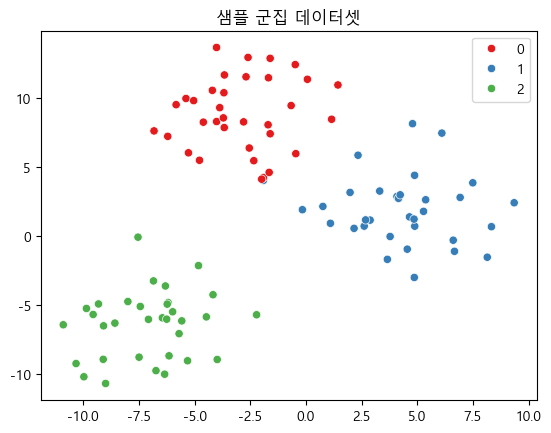

In [4]:
# 샘플 군집 생성하기 - 복붙
# 연습용 군집 데이터셋 생성하는 sklearn 라이브러리 함수
from sklearn.datasets import make_blobs

X, labels = make_blobs(n_samples=100, centers=3,
                      cluster_std=2.5,
                      random_state=42)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1')
plt.title('샘플 군집 데이터셋')

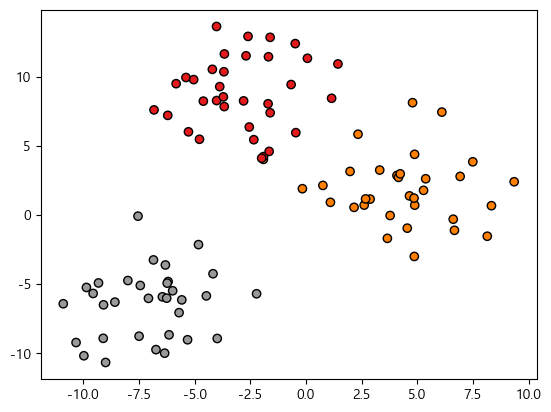

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1')

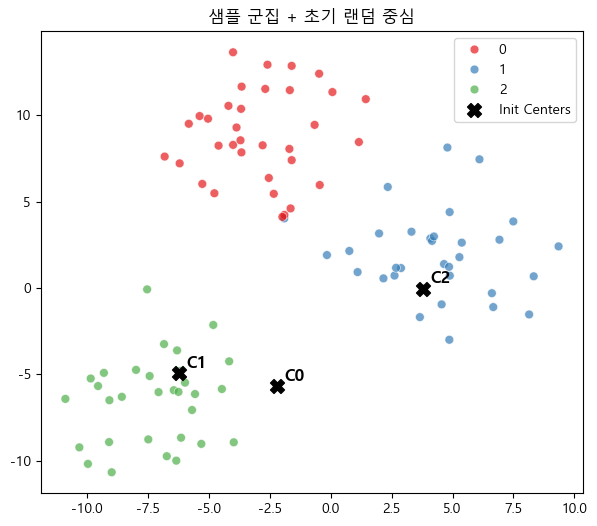

In [255]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# 1. 샘플 군집 데이터 생성
X, clust = make_blobs(
    centers=3,
    cluster_std=2.5,
    random_state=42
)

# 2. 랜덤 초기 중심 3개 생성
np.random.seed(42)
init_centers = X[np.random.choice(len(X), size=3, replace=False)]

# 3. 시각화
plt.figure(figsize=(7, 6))

# 실제 데이터
sns.scatterplot(
    x=X[:, 0], y=X[:, 1],
    hue=clust, palette='Set1',
    s=40, alpha=0.7
)

# 초기 중심 (X 마커)
plt.scatter(
    init_centers[:, 0],
    init_centers[:, 1],
    marker='X',
    s=100,
    color='black',
    label='Init Centers'
)

# 라벨 표시
for i, (x, y) in enumerate(init_centers):
    plt.text(x + 0.3, y + 0.3, f'C{i}', fontsize=12, fontweight='bold')

plt.title('샘플 군집 + 초기 랜덤 중심')
plt.legend()
plt.show()


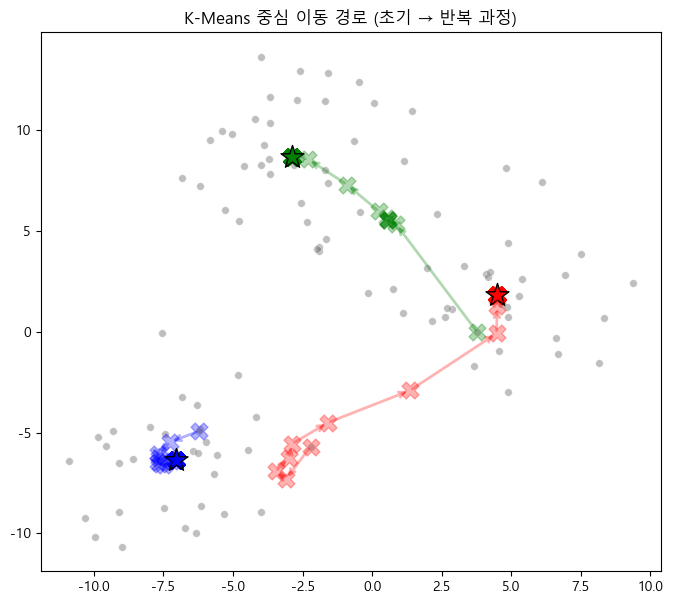

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# 1. 데이터 생성
X, _ = make_blobs(centers=3, cluster_std=2.5, random_state=42)

# --------------------------------------------------------
# 2. k-means 초기화 + 수동 iteration 수행 (중심 이동 추적)
# --------------------------------------------------------

def run_kmeans_with_tracking(X, k=3, max_iter=5):
    np.random.seed(42)

    # 초기 중심 랜덤 선택
    centers = X[np.random.choice(len(X), size=k, replace=False)]
    history = [centers.copy()]  # 초기 중심 기록

    for it in range(max_iter):
        # 각 점을 가장 가까운 중심에 할당
        dists = np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=2)
        labels = np.argmin(dists, axis=1)

        # 중심 업데이트
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        history.append(new_centers.copy())

        centers = new_centers

    return history

# 중심 이동 기록
history = run_kmeans_with_tracking(X, k=3, max_iter=50)

# --------------------------------------------------------
# 3. 시각화
# --------------------------------------------------------

plt.figure(figsize=(8, 7))

# 데이터 점
sns.scatterplot(x=X[:, 0], y=X[:, 1], color='gray', s=30, alpha=0.5)

colors = ['red', 'blue', 'green']

# iteration별 중심 이동 화살표 시각화
for c in range(3):  # 3개 클러스터
    for i in range(len(history) - 1):
        x_old, y_old = history[i][c]
        x_new, y_new = history[i + 1][c]

        plt.scatter(x_old, y_old, color=colors[c], marker='X', s=150, alpha=0.3)
        plt.annotate(
            "", 
            xy=(x_new, y_new), 
            xytext=(x_old, y_old),
            arrowprops=dict(arrowstyle="->", color=colors[c], lw=2, alpha=0.3)
        )

# 마지막 중심점 강조
for c in range(3):
    x_final, y_final = history[-1][c]
    plt.scatter(x_final, y_final, color=colors[c], marker='*', s=300, edgecolor='black')

plt.title("K-Means 중심 이동 경로 (초기 → 반복 과정)")
plt.show()


In [273]:
# 애니메이션 버전
import numpy as np
from sklearn.datasets import make_blobs

# 1. 데이터 생성
X, _ = make_blobs(centers=3, cluster_std=2.5, random_state=42)

# 2. k-means 수동 구현 (중심 이동 추적)
def run_kmeans_with_tracking(X, k=3, max_iter=50, random_state=42):
    rng = np.random.RandomState(random_state)
    centers = X[rng.choice(len(X), size=k, replace=False)]
    history_centers = [centers.copy()]
    history_labels = []

    for it in range(max_iter):
        # 거리 계산
        dists = np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=2)
        labels = np.argmin(dists, axis=1)
        history_labels.append(labels.copy())

        # 중심 업데이트
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        history_centers.append(new_centers.copy())
        centers = new_centers

    return history_centers, history_labels

history_centers, history_labels = run_kmeans_with_tracking(X, k=3, max_iter=10)


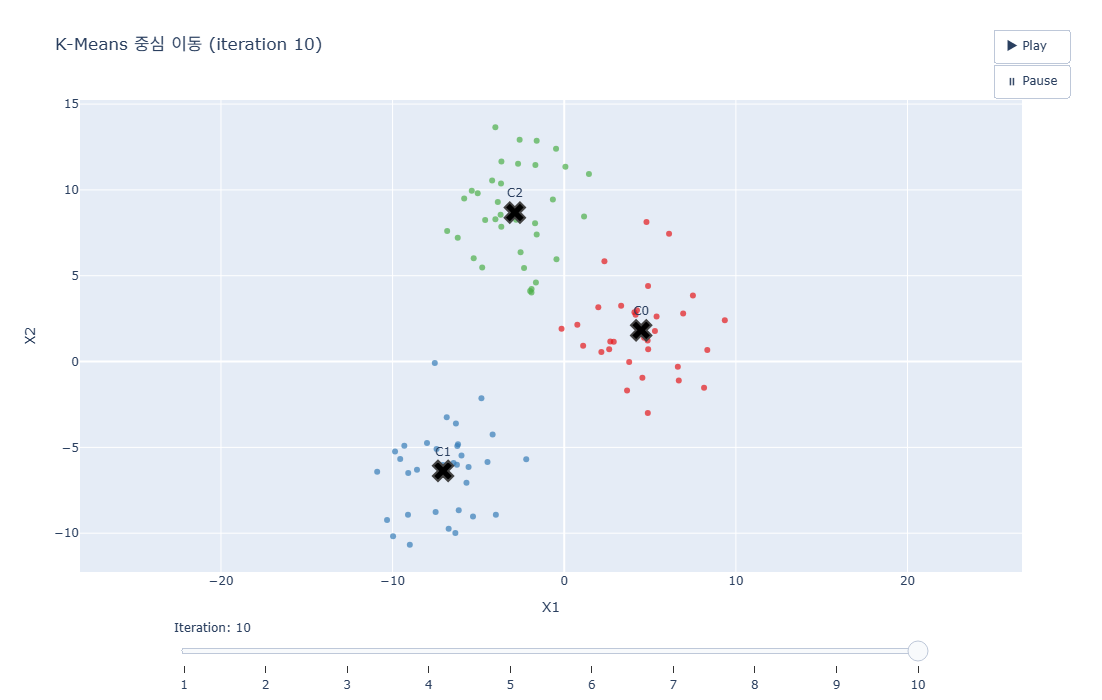

In [275]:
import plotly.graph_objects as go
import plotly.express as px

k = 3
n_iter = len(history_centers) - 1  # 업데이트 횟수

# 색 팔레트
palette = px.colors.qualitative.Set1[:k]

# 초기 figure (iteration 0)
fig = go.Figure()

# 데이터 포인트 (초기에는 라벨 없음 -> 전부 회색)
fig.add_trace(go.Scatter(
    x=X[:, 0], y=X[:, 1],
    mode='markers',
    marker=dict(size=6, color='lightgray'),
    name='points'
))

# 초기 중심
init_centers = history_centers[0]
fig.add_trace(go.Scatter(
    x=init_centers[:, 0],
    y=init_centers[:, 1],
    mode='markers+text',
    marker=dict(size=16, symbol='x', color='black'),
    text=[f'C{j}' for j in range(k)],
    textposition='top center',
    name='centers (iter 0)'
))

# 프레임 생성
frames = []
for it in range(1, n_iter + 1):
    centers_prev = history_centers[it - 1]
    centers_curr = history_centers[it]
    labels = history_labels[it - 1]

    # 포인트 색은 해당 iteration의 라벨로 칠하기
    point_colors = [palette[l] for l in labels]

    # 포인트 trace
    points_trace = go.Scatter(
        x=X[:, 0],
        y=X[:, 1],
        mode='markers',
        marker=dict(size=6, color=point_colors, opacity=0.7),
        name=f'points (iter {it})',
        showlegend=False
    )

    # 현재 중심 trace
    centers_trace = go.Scatter(
        x=centers_curr[:, 0],
        y=centers_curr[:, 1],
        mode='markers+text',
        marker=dict(size=18, symbol='x', color='black', line=dict(width=2)),
        text=[f'C{j}' for j in range(k)],
        textposition='top center',
        name=f'centers (iter {it})',
        showlegend=False
    )

    # 화살표(이전 중심 → 현재 중심)
    arrows = []
    for j in range(k):
        x0, y0 = centers_prev[j]
        x1, y1 = centers_curr[j]
        arrows.append(
            dict(
                x=x1, y=y1,
                ax=x0, ay=y0,
                xref='x', yref='y',
                axref='x', ayref='y',
                showarrow=True,
                arrowhead=3,
                arrowsize=1,
                arrowwidth=2,
                arrowcolor=palette[j]
            )
        )

    frame = go.Frame(
        data=[points_trace, centers_trace],
        name=f'iter {it}',
        layout=go.Layout(
            title_text=f'K-Means 중심 이동 (iteration {it})',
            annotations=arrows
        )
    )
    frames.append(frame)

fig.frames = frames

# 레이아웃 + 슬라이더 / 버튼
fig.update_layout(
    title='K-Means 중심 이동 경로 (Plotly 애니메이션)',
    xaxis_title='X1',
    yaxis_title='X2',
    width=800,
    height=700,
    xaxis=dict(scaleanchor='y', scaleratio=1),
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            x=1.05, y=1.15,
            buttons=[
                dict(
                    label='▶ Play',
                    method='animate',
                    args=[None, {
                        'frame': {'duration': 800, 'redraw': True},
                        'fromcurrent': True,
                        'transition': {'duration': 300}
                    }]
                ),
                dict(
                    label='⏸ Pause',
                    method='animate',
                    args=[[None], {
                        'frame': {'duration': 0, 'redraw': False},
                        'mode': 'immediate',
                        'transition': {'duration': 0}
                    }]
                )
            ]
        )
    ],
    sliders=[
        dict(
            steps=[
                dict(
                    method='animate',
                    label=f'{i}',
                    args=[[f'iter {i}'], {
                        'frame': {'duration': 0, 'redraw': True},
                        'mode': 'immediate',
                        'transition': {'duration': 0}
                    }]
                ) for i in range(1, n_iter + 1)
            ],
            x=0.1,
            y=-0.05,
            len=0.8,
            active=0,
            currentvalue=dict(prefix='Iteration: ')
        )
    ]
)

fig.show()


# 덴드로그램

In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(X, method='ward')

In [82]:
z.round(0)

array([[ 1., 24.,  0.,  2.],
       [25., 35.,  0.,  2.],
       [17., 28.,  0.,  2.],
       [22., 26.,  0.,  2.],
       [ 9., 30.,  1.,  2.],
       [43., 46.,  1.,  2.],
       [37., 49.,  1.,  2.],
       [41., 53.,  1.,  3.],
       [ 7., 13.,  1.,  2.],
       [27., 38.,  1.,  2.],
       [18., 29.,  1.,  2.],
       [14., 34.,  1.,  2.],
       [21., 51.,  1.,  3.],
       [ 6., 44.,  1.,  2.],
       [ 8., 31.,  1.,  2.],
       [32., 56.,  1.,  3.],
       [ 2., 12.,  2.,  2.],
       [23., 47.,  2.,  2.],
       [16., 54.,  2.,  3.],
       [48., 60.,  2.,  3.],
       [20., 61.,  2.,  3.],
       [40., 42.,  2.,  2.],
       [36., 62.,  2.,  4.],
       [15., 58.,  2.,  3.],
       [39., 68.,  2.,  4.],
       [55., 63.,  2.,  4.],
       [ 5., 33.,  2.,  2.],
       [10., 65.,  3.,  4.],
       [50., 73.,  3.,  5.],
       [52., 67.,  3.,  4.],
       [64., 70.,  3.,  5.],
       [ 4., 19.,  3.,  2.],
       [57., 75.,  3.,  7.],
       [59., 66.,  3.,  4.],
       [72., 7

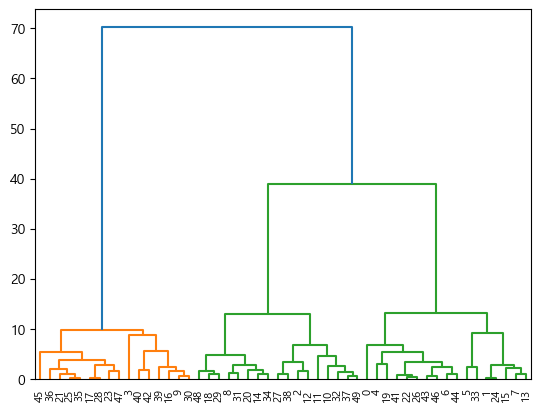

In [90]:
dendrogram(z)
plt.show()

In [20]:
X.shape

(100, 2)

In [111]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram

In [205]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X)

-5786.584749154904

In [211]:
from sklearn.metrics import silhouette_score
silhouette_score(X, km.labels_)

0.6194258553109038

# k-means에서 군집 개수를 선정하는 방법

In [287]:
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)
km.inertia_

393.8876664256394

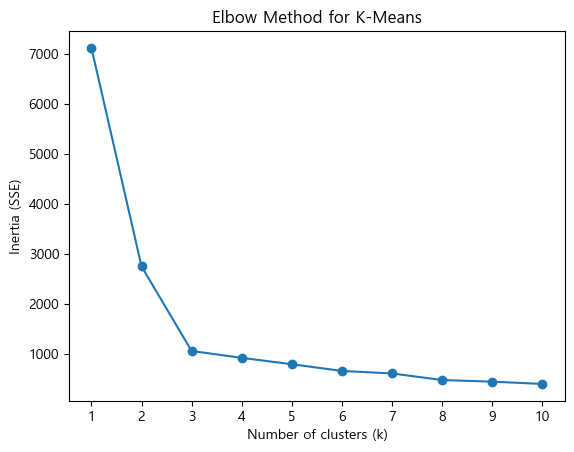

In [283]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
ks = range(1, 11)  # k = 1 ~ 10까지 확인

for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)  # SSE 값

plt.plot(ks, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for K-Means')
plt.xticks(ks)
plt.show()


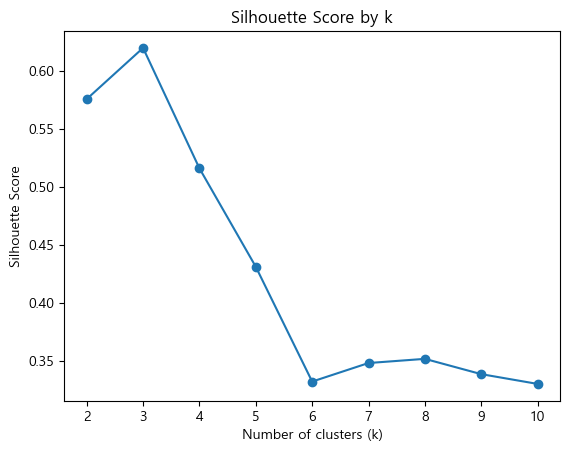

In [221]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):   # 실루엣은 k=1은 정의 안 됨
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    labels = km.labels_
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)

plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by k')
plt.xticks(range(2, 11))
plt.show()


1, [[-2.87724967  8.68111406]
 [-7.05983325 -6.37037734]
 [ 4.48265803  1.82065891]]
2, [[-2.87724967  8.68111406]
 [-7.05983325 -6.37037734]
 [ 4.48265803  1.82065891]]


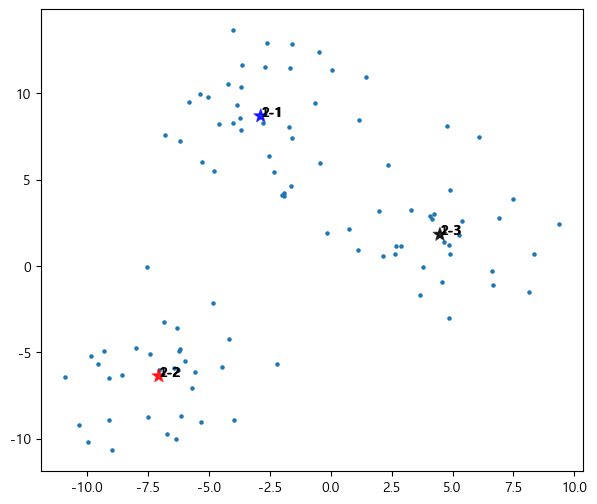

In [16]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

centers_list = []

plt.figure(figsize=(7,6))
for n in range(1, 3):
    km = KMeans(
        # init='random',
        n_clusters=3,
        tol=10,
        n_init=n,
        random_state=42
    )
    km.fit(X)
    print(f'{n}, {km.cluster_centers_}')
    centers_list.append(km.cluster_centers_)

# 원 데이터 플롯
plt.scatter(X[:,0], X[:,1], s=5)

# 중심점 + 번호 라벨 표시
for i, centers in enumerate(centers_list, start=1):
    # color = ['Blue','Red','Black']

    # 중심점 찍기
    plt.scatter(
        centers[:,0],
        centers[:,1],
        s=50*i,
        marker='*',
        color=['Blue','Red','Black'],
        alpha=0.6,
        label= i
    )
    # ➤ 각 중심점 좌표에 번호 텍스트 추가
    # 중심점 텍스트 라벨
    for idx, (cx, cy) in enumerate(centers, start=1):
        plt.text(
            cx,
            cy,
            f"{i}-{idx}",     # <-- 여기가 라벨
            fontsize=10,
            fontweight='bold',
            color='black'
        )



In [132]:
centers_list[1]

array([[-9.54760333,  9.44208338,  6.5870432 , -5.77085707, -6.40874976],
       [-2.4910852 ,  9.0431518 ,  4.65105235,  1.99106576, -6.89164287],
       [-6.92771422, -8.86186699,  7.33881855,  2.09732368,  4.06967905]])

In [117]:
centers_list[0]

array([[-9.54760333,  9.44208338,  6.5870432 , -5.77085707, -6.40874976],
       [-2.4910852 ,  9.0431518 ,  4.65105235,  1.99106576, -6.89164287],
       [-6.92771422, -8.86186699,  7.33881855,  2.09732368,  4.06967905]])

In [119]:
centers_list

[array([[-9.54760333,  9.44208338,  6.5870432 , -5.77085707, -6.40874976],
        [-2.4910852 ,  9.0431518 ,  4.65105235,  1.99106576, -6.89164287],
        [-6.92771422, -8.86186699,  7.33881855,  2.09732368,  4.06967905]]),
 array([[-9.54760333,  9.44208338,  6.5870432 , -5.77085707, -6.40874976],
        [-2.4910852 ,  9.0431518 ,  4.65105235,  1.99106576, -6.89164287],
        [-6.92771422, -8.86186699,  7.33881855,  2.09732368,  4.06967905]]),
 array([[-9.54760333,  9.44208338,  6.5870432 , -5.77085707, -6.40874976],
        [-2.4910852 ,  9.0431518 ,  4.65105235,  1.99106576, -6.89164287],
        [-6.92771422, -8.86186699,  7.33881855,  2.09732368,  4.06967905]]),
 array([[-9.54760333,  9.44208338,  6.5870432 , -5.77085707, -6.40874976],
        [-2.4910852 ,  9.0431518 ,  4.65105235,  1.99106576, -6.89164287],
        [-6.92771422, -8.86186699,  7.33881855,  2.09732368,  4.06967905]])]

# DBSCAN

Text(0.5, 1.0, '샘플 군집 데이터셋')

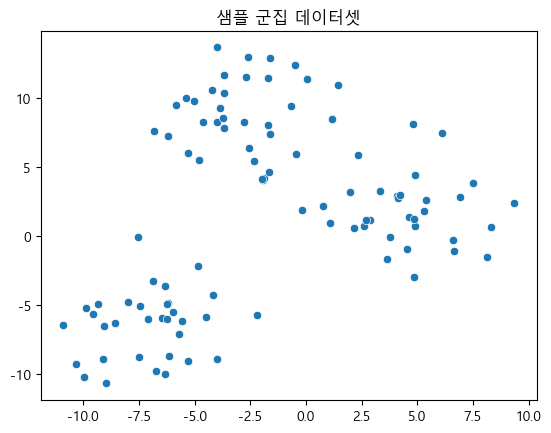

In [130]:
# 샘플 군집 생성하기
from sklearn.datasets import make_blobs

X, clust = make_blobs(n_samples=100, centers=3,
                      cluster_std=2.5,
                      random_state=42)

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title('샘플 군집 데이터셋')

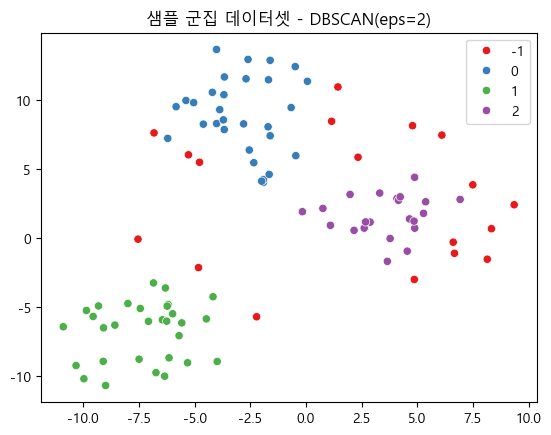

In [166]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2)
dbscan.fit(X)
labels = dbscan.labels_
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette='Set1')
plt.title('샘플 군집 데이터셋 - DBSCAN(eps=2)')
plt.show()

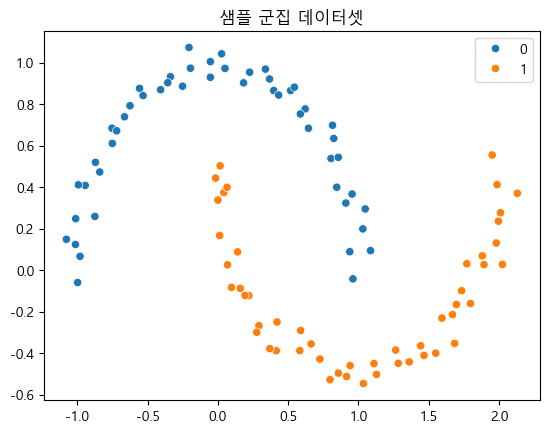

In [222]:
from sklearn.datasets import make_moons
X, cluster = make_moons(random_state=42, noise=0.05)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=cluster)
plt.title('샘플 군집 데이터셋')
plt.show()

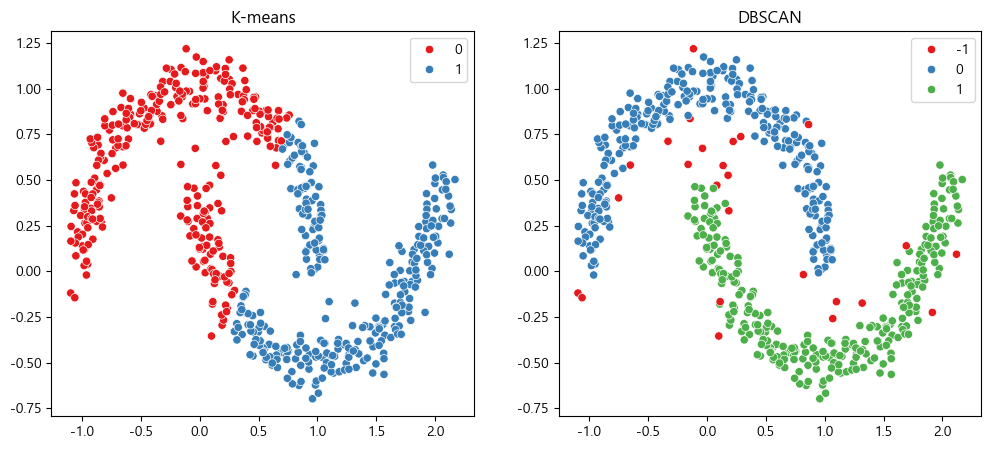

In [248]:
X, y = make_moons(n_samples=500, noise=0.08, random_state=42)

# K-means
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
k_labels = kmeans.fit_predict(X)

# DBSCAN
db = DBSCAN(eps=0.1, min_samples=5)
db_labels = db.fit_predict(X)


fig, axes = plt.subplots(1,2, figsize=(12,5))
ax = axes.flatten()
sns.scatterplot(ax=ax[0], x=X[:,0], y=X[:,1], hue=k_labels, palette='Set1')
ax[0].set_title('K-means')

sns.scatterplot(ax=ax[1], x=X[:,0], y=X[:,1], hue=db_labels, palette='Set1')
ax[1].set_title('DBSCAN')

# 붓꽃 데이터

* 적정 군집 수(K)를 찾는다
* 군집 분류한다.
* 군집별 특성을 요약/기술한다.

In [17]:
# 집값 데이터
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(
    data = data.data,
    columns=data.feature_names)

In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


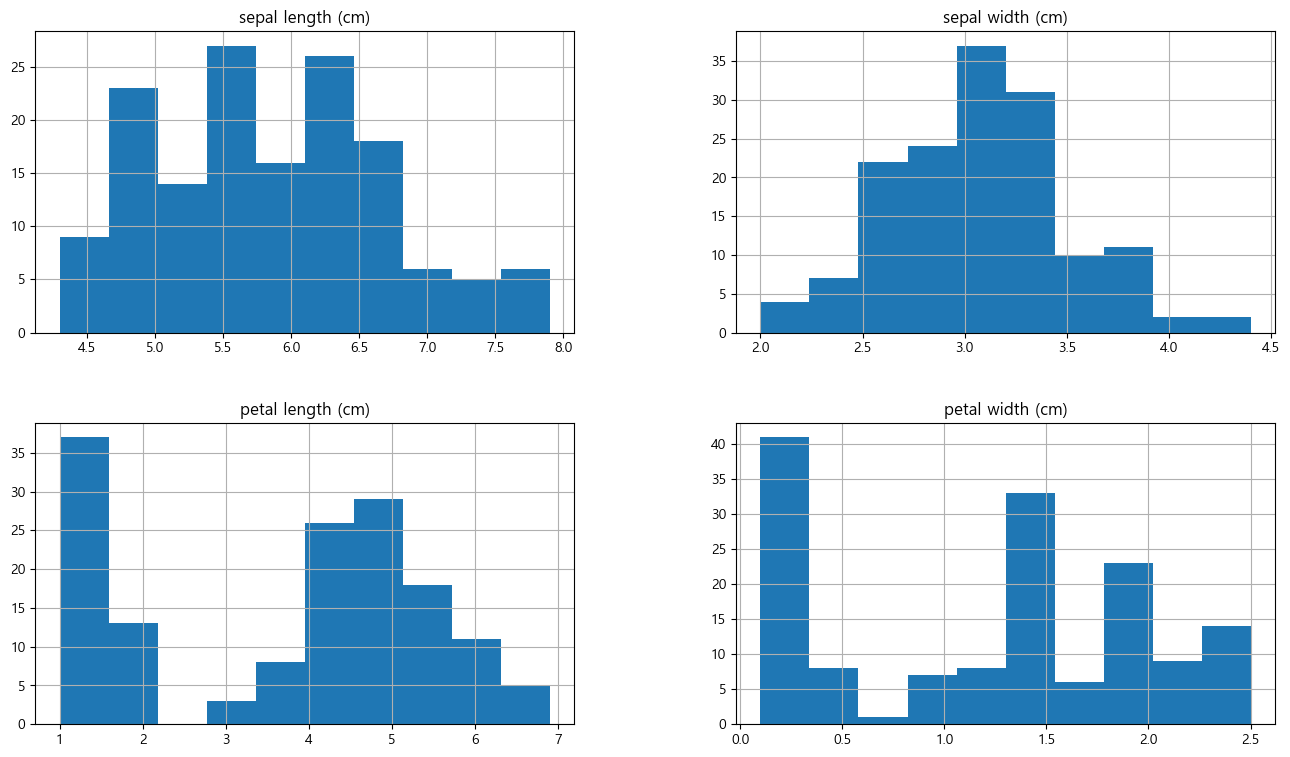

In [19]:
df.hist(figsize=(16,9))
plt.show()

In [13]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from tqdm import tqdm
iners = []
sils = []
datas = df.copy()
for k in tqdm(range(2,9)):
    pipe = make_pipeline(
        # MinMaxScaler(),
        # StandardScaler(),
        KMeans(n_clusters=k)
        )
    pipe.fit(datas)
    labels = pipe.predict(datas)
    inertia = pipe[0].inertia_
    sil = silhouette_score(datas, labels) 
    iners.append(inertia)
    sils.append(sil)

100%|██████████| 7/7 [00:00<00:00, 36.39it/s]


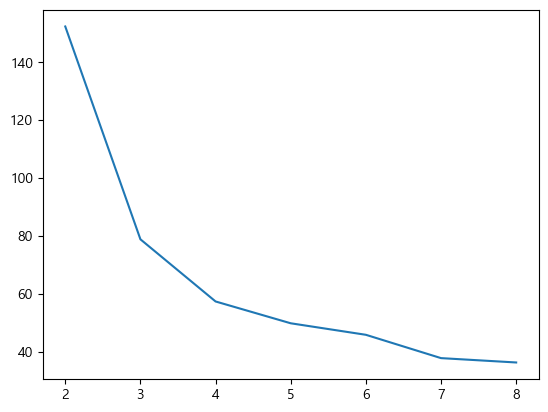

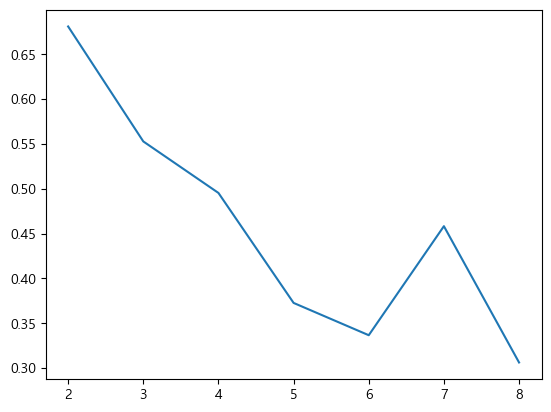

In [56]:
plt.plot(range(2,9), iners)
plt.show()
plt.plot(range(2,9), sils)
plt.show()

In [546]:
# k=3
pipe = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=3)
    )
pipe.fit(datas)
pipe.inera

array([[0.21295824, 3.15861505, 4.00404832],
       [0.99604549, 2.72563625, 4.05055769],
       [0.65198444, 3.02188403, 4.22040251],
       [0.9034561 , 2.93043986, 4.22860026],
       [0.40215457, 3.33653691, 4.12353003],
       [1.21154793, 3.52936423, 3.89643029],
       [0.50244932, 3.19234391, 4.2374443 ],
       [0.09132468, 3.03242342, 3.99197553],
       [1.42174651, 2.9795537 , 4.4445734 ],
       [0.78993078, 2.84221713, 4.08705397],
       [0.78999385, 3.3507236 , 3.92610748],
       [0.27618123, 3.09168785, 4.09865843],
       [1.03497888, 2.85719428, 4.19718995],
       [1.33482453, 3.26547013, 4.66454355],
       [1.63865558, 3.90871872, 4.13826195],
       [2.39898792, 4.51414747, 4.47633229],
       [1.20748818, 3.63475229, 4.02762963],
       [0.21618828, 3.09288714, 3.92839122],
       [1.20986655, 3.36736664, 3.72388908],
       [0.86706182, 3.53103908, 4.10521298],
       [0.50401564, 2.8436663 , 3.67990695],
       [0.66826437, 3.30977167, 3.95222508],
       [0.

In [502]:
sse_per_n = []

##문제1) 최적의 k를 구하는 순환(for문)코드를 작성하시오.
##      k의 범위는 1~12, 2간격으로 입력
for i in range(1, 13, 2):
    model = KMeans(n_clusters=i)
    model.fit(df)
    sse = model.inertia_
    sse_per_n += [sse]
print(sse_per_n)


[681.3706, 78.85144142614601, 46.47223015873016, 37.53863535980927, 28.60498975044564, 24.60514724310777]


In [504]:
score

[681.3706,
 152.3479517603579,
 78.85144142614601,
 57.256009315718146,
 51.80504347826087,
 39.066035353535355,
 37.805082864246174,
 33.38701597911892,
 28.340753607503615]

array([[3.95203701, 2.86036674, 2.98921391, 1.16499181],
       [3.93618336, 2.84769542, 2.9755419 , 1.15122436],
       [3.57317857, 2.30364572, 2.83915788, 0.61378296],
       ...,
       [3.10163205, 0.93035203, 3.91345501, 2.50395858],
       [3.10945478, 0.86132148, 3.87951435, 2.4150818 ],
       [3.02254833, 0.70074381, 3.6812689 , 2.15765722]])

In [388]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [123]:
X[:, 1].shape

(100,)

In [94]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons

# 1) 볼록한(둥근) 클러스터 3개
X_blobs, y_blobs = make_blobs(
    n_samples=300,
    centers=[(-5, 0), (0, 5), (5, 0)],
    cluster_std=[0.8, 1.0, 0.5],   # 서로 다른 밀도
    random_state=42
)

# 2) 반달 모양 클러스터 2개 (비볼록 구조)
X_moons, y_moons = make_moons(
    n_samples=300,
    noise=0.05,
    random_state=42
)
# moons는 위치를 조금 옮겨서 blobs와 겹치지 않게
X_moons[:, 0] = X_moons[:, 0] * 3 + 2   # x축 늘리고 이동
X_moons[:, 1] = X_moons[:, 1] * 3 - 6   # y축 늘리고 이동

# 3) 랜덤 노이즈(완전 잡음 포인트)
rng = np.random.RandomState(42)
X_noise = rng.uniform(low=-10, high=10, size=(80, 2))

# 4) 전부 합치기
X = np.vstack([X_blobs, X_moons, X_noise])

print(X.shape)   # (680, 2)


(680, 2)


In [96]:
from sklearn.cluster import KMeans, DBSCAN

# KMeans (k=5 가정: blob 3 + moon 2)
kmeans = KMeans(n_clusters=5, random_state=42)
k_labels = kmeans.fit_predict(X)

# DBSCAN (eps와 min_samples는 데이터에 맞게 튜닝 필요)
dbscan = DBSCAN(eps=0.7, min_samples=10)
db_labels = dbscan.fit_predict(X)

print("KMeans 군집 수:", len(np.unique(k_labels)))
print("DBSCAN 군집 수(노이즈 포함):", len(np.unique(db_labels)))
print("DBSCAN에서 노이즈(label=-1) 개수:", np.sum(db_labels == -1))


KMeans 군집 수: 5
DBSCAN 군집 수(노이즈 포함): 6
DBSCAN에서 노이즈(label=-1) 개수: 82


X shape: (680, 2)
KMeans 군집 수: 5
DBSCAN 군집 라벨: [-1  0  1  2  3  4]
DBSCAN 노이즈 개수(label = -1): 82


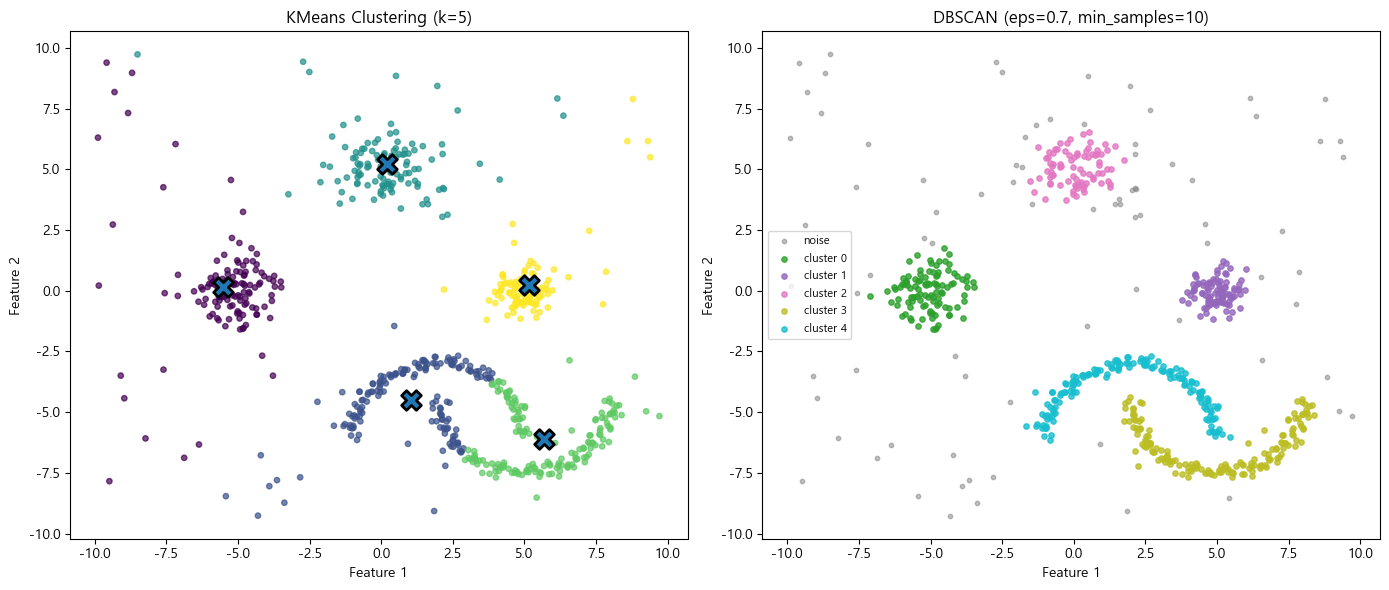

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN

# ---------------------------
# 1) 샘플 데이터 생성
# ---------------------------
# 둥근(cloud) 형태의 blob 3개
X_blobs, y_blobs = make_blobs(
    n_samples=300,
    centers=[(-5, 0), (0, 5), (5, 0)],
    cluster_std=[0.8, 1.0, 0.5],
    random_state=42
)

# 휘어진 moon 2개
X_moons, y_moons = make_moons(
    n_samples=300,
    noise=0.05,
    random_state=42
)
# 위치 옮겨서 안 겹치게
X_moons[:, 0] = X_moons[:, 0] * 3 + 2
X_moons[:, 1] = X_moons[:, 1] * 3 - 6

# 랜덤 노이즈
rng = np.random.RandomState(42)
X_noise = rng.uniform(low=-10, high=10, size=(80, 2))

# 전체 데이터 합치기
X = np.vstack([X_blobs, X_moons, X_noise])

print("X shape:", X.shape)

# ---------------------------
# 2) KMeans / DBSCAN 학습
# ---------------------------
# KMeans: blob3 + moon2 = 5개라고 가정
kmeans = KMeans(n_clusters=5, random_state=42)
k_labels = kmeans.fit_predict(X)
k_centers = kmeans.cluster_centers_

# DBSCAN: eps, min_samples는 대략적인 값 (데이터에 따라 조정 가능)
dbscan = DBSCAN(eps=0.7, min_samples=10)
d_labels = dbscan.fit_predict(X)

print("KMeans 군집 수:", len(np.unique(k_labels)))
print("DBSCAN 군집 라벨:", np.unique(d_labels))
print("DBSCAN 노이즈 개수(label = -1):", np.sum(d_labels == -1))

# ---------------------------
# 3) 시각화
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- (1) KMeans 결과 ---
axes[0].scatter(X[:, 0], X[:, 1], c=k_labels, s=15, alpha=0.7)
axes[0].scatter(
    k_centers[:, 0], k_centers[:, 1],
    marker='X', s=200, linewidths=2, edgecolors='k'
)
axes[0].set_title("KMeans Clustering (k=5)")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# --- (2) DBSCAN 결과 ---
# DBSCAN에서 -1은 노이즈니까 따로 색 지정
# 노이즈: 회색, 군집: colormap
unique_labels = np.unique(d_labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    if lab == -1:
        # 노이즈
        col = (0.5, 0.5, 0.5, 0.5)  # 회색, 반투명
        mask = (d_labels == lab)
        axes[1].scatter(X[mask, 0], X[mask, 1], c=[col], s=10, label="noise")
    else:
        mask = (d_labels == lab)
        axes[1].scatter(X[mask, 0], X[mask, 1], c=[col], s=15, alpha=0.8, label=f"cluster {lab}")

axes[1].set_title(f"DBSCAN (eps=0.7, min_samples=10)")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].legend(loc="best", fontsize=8)

plt.tight_layout()
plt.show()


# 차원축소

## PCA

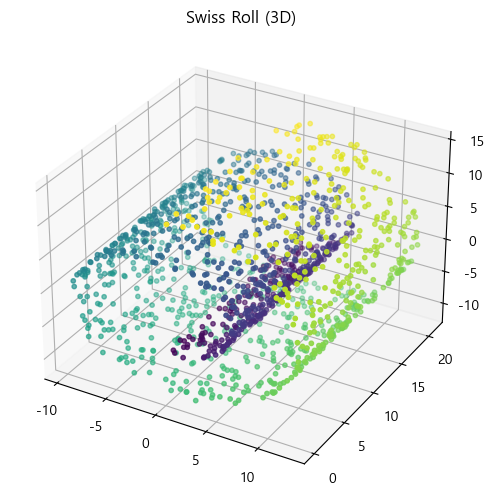

In [62]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 생성
X, t = make_swiss_roll(
    n_samples=1500,
    noise=0.1,
    random_state=42
)

# 시각화 (3D)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=t, cmap='viridis', s=10)
ax.set_title("Swiss Roll (3D)")
plt.show()


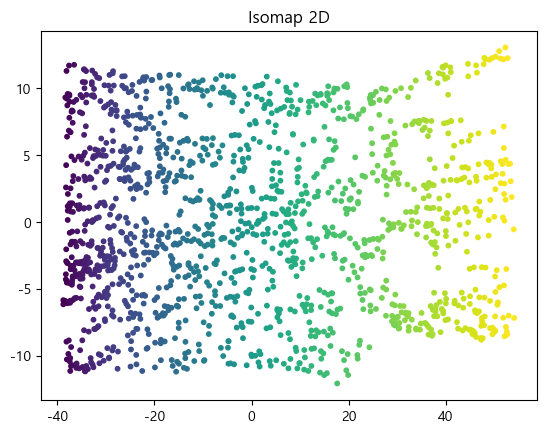

In [64]:
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors=10, n_components=2)
X_iso = isomap.fit_transform(X)

plt.scatter(X_iso[:,0], X_iso[:,1], c=t, cmap='viridis', s=10)
plt.title("Isomap 2D")
plt.show()


설명분산비율: [0.40727296 0.30616037 0.28656667]
총 설명분산: 1.0


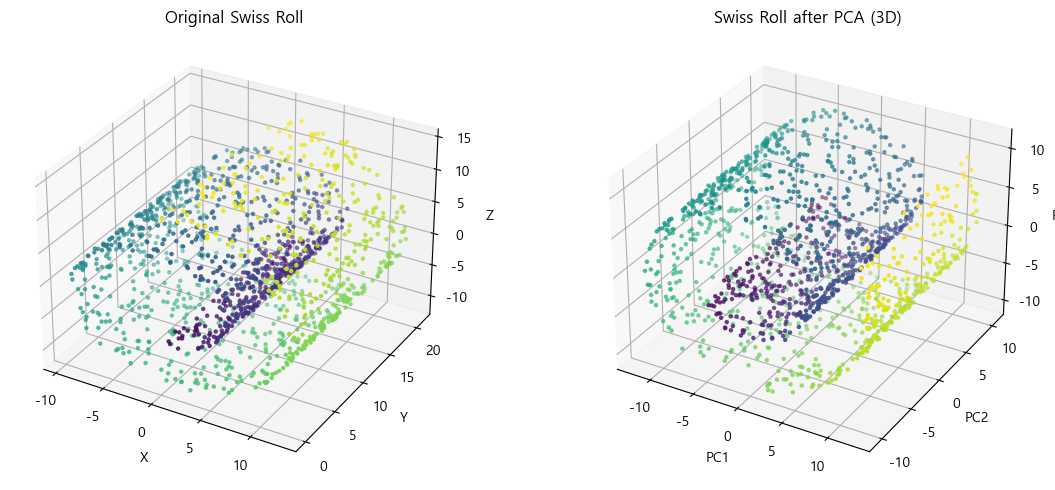

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA

# 1. 스위스롤 데이터 생성
X, t = make_swiss_roll(
    n_samples=1500,
    noise=0.1,
    random_state=42
)  # X.shape = (1500, 3)

# 2. PCA 3차원으로 수행
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

print("설명분산비율:", pca.explained_variance_ratio_)
print("총 설명분산:", pca.explained_variance_ratio_.sum())

# 3. 원본 vs PCA변환 결과 3D 시각화
fig = plt.figure(figsize=(12, 5))

# (1) 원본 스위스롤
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, s=5, cmap='viridis')
ax1.set_title("Original Swiss Roll")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

# (2) PCA 3D 결과
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_pca[:, 0], X_pca[:, 2], X_pca[:, 1], c=t, s=5, cmap='viridis')
ax2.set_title("Swiss Roll after PCA (3D)")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")

plt.tight_layout()
plt.show()


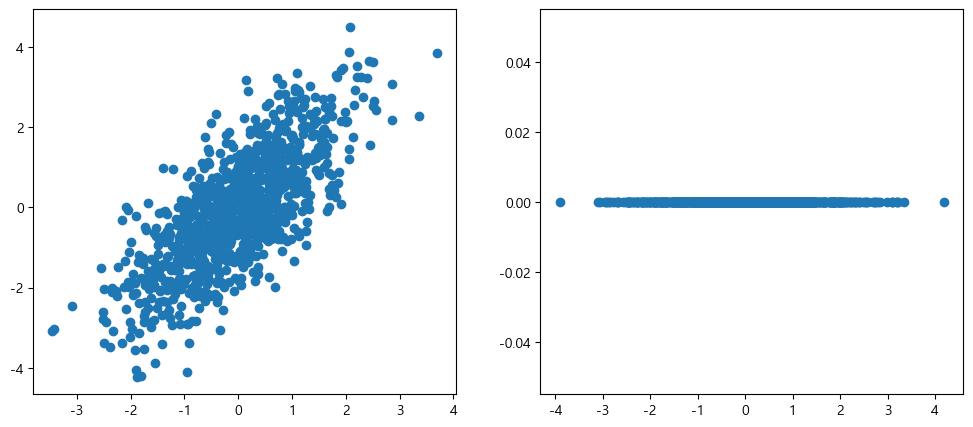

In [126]:
# import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 데이터셋
X = np.random.randn(1000,2)
X[:,1] = X[:,0] + X[:,1]

#pca 차원축소
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X[:, 0], X[:, 1])
axes[1].scatter(X_pc1[:, 0], np.zeros_like(X_pc1[:, 0]))
plt.show()

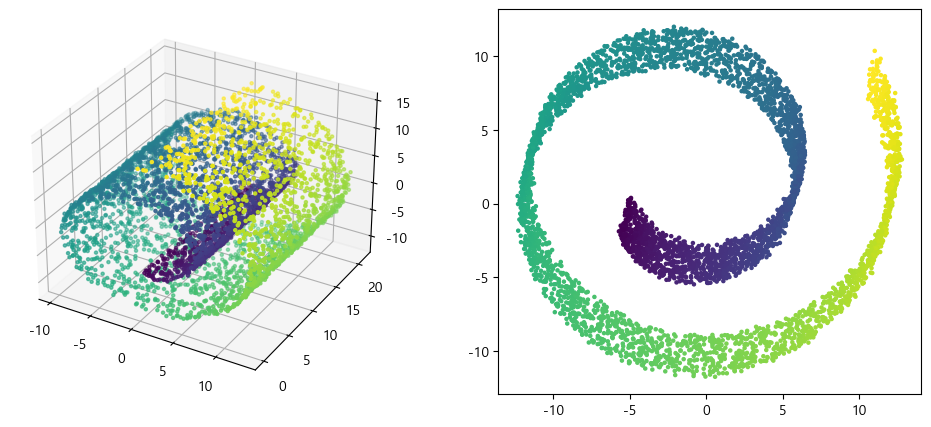

In [204]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=5000, noise=0.1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, s=5)

ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:,0], X_pca[:,1], c=t, s=5)
plt.show()

In [233]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
ss = StandardScaler()
df = ss.fit_transform(df)
df

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

<Axes: >

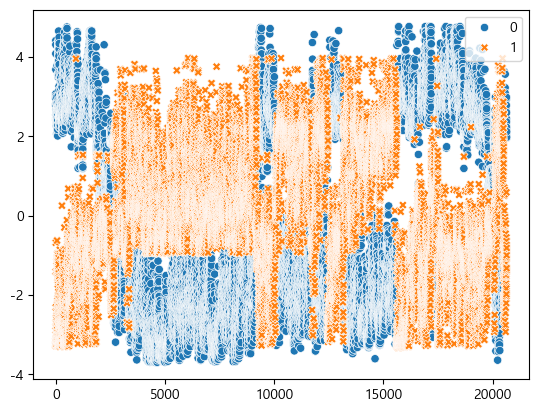

In [235]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=250, n_jobs=-1)
df_tsne = tsne.fit_transform(df)
df_tsne = pd.DataFrame(df_tsne)
sns.scatterplot(df_tsne)

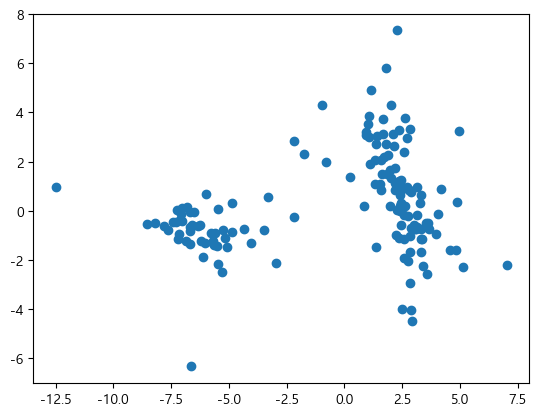

In [301]:
from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# ss = StandardScaler()
# df = ss.fit_transform(df)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10,  n_iter=250, n_jobs=-1)
df_tsne = tsne.fit_transform(df)
# df_tsne = pd.DataFrame(df_tsne)
plt.scatter(df_tsne[:,0], df_tsne[:,1])

In [22]:
from sklearn.datasets import load_iris, fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
iris = load_iris()
iris = fetch_california_housing()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# df['species'] = iris.target

# # 간단한 산점도 (Petal length vs Petal width)
# plt.figure(figsize=(7,5))
# sns.scatterplot(
#     data=df,
#     x="petal length (cm)",
#     y="petal width (cm)",
#     hue="species",
#     palette="Dark2",
#     s=40
# )
# plt.title("Iris Flower Scatter Plot (2D)")
# plt.show()


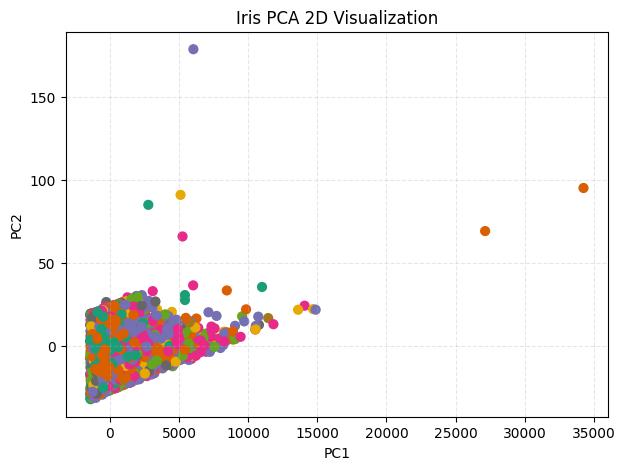

In [23]:
from sklearn.decomposition import PCA

X = iris.data
y = iris.target
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='Dark2', s=40)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris PCA 2D Visualization")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


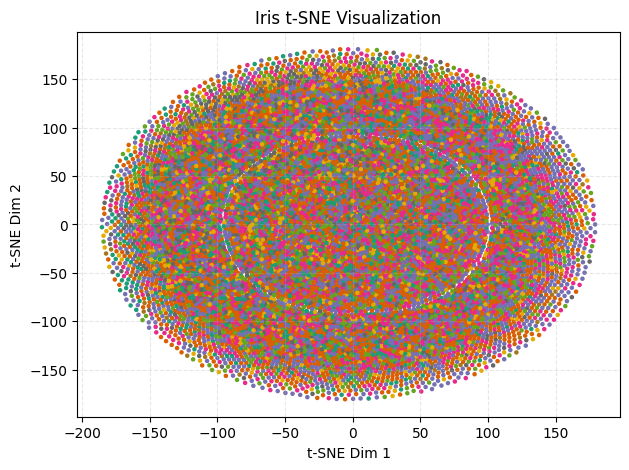

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=0.7)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(7,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='Dark2', s=5)
plt.title("Iris t-SNE Visualization")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\pooko\anaconda3\envs\bibiml\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\pooko\anaconda3\envs\bibiml\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\pooko\anaconda3\envs\bibiml\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\pooko\anaconda3\envs\bibiml\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 4: invalid start byte


Silhouette Score: 0.5601697480957204


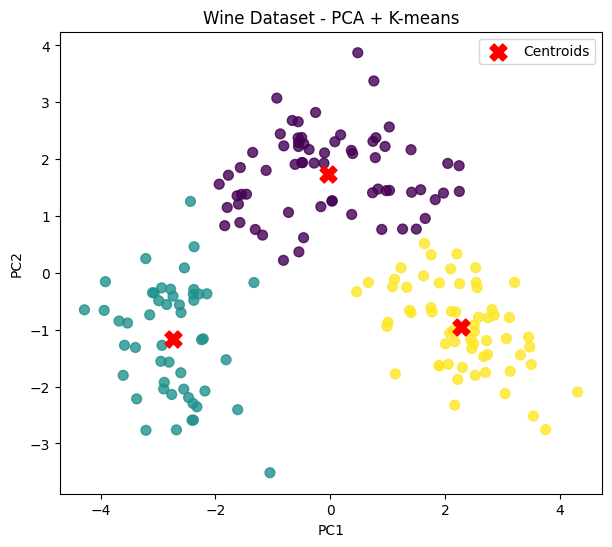

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1) 데이터 로드
wine = load_wine()
X = wine.data
y = wine.target   # (평가용, 군집에는 사용 X)

# 2) 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) PCA(2차원)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4) K-means 군집
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# 5) 실루엣 스코어
score = silhouette_score(X_pca, cluster_labels)
print("Silhouette Score:", score)

# 6) 시각화
plt.figure(figsize=(7, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=cluster_labels,
    s=50, cmap="viridis", alpha=0.8
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1],
    c="red", s=150, marker="X", label="Centroids"
)
plt.title("Wine Dataset - PCA + K-means")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])